# Project: Iris Flower Classification

#                                                    `About Author`

## Hi Everyone! Welcome to my notebook. I am Malik Talha, and I am a student of the Data Science and doing my internship at CodeAlpha. In this notebook, I will be using the Iris dataset to build a model that can predict the species of an Iris flower.

### GitHub Link: https://github.com/MalikTalha709

### LinkedIn Link: https://www.linkedin.com/in/malik-talha-0b6a58304/

### Gmail: maliktalha1515@gmail.com

# Overview:

This dataset contains information about flowers with the following attributes:

* Id: Unique identifier for each entry.
* Sepal Length (cm): Length of the sepal in centimeters.
* Sepal Width (cm): Width of the sepal in centimeters.
* Petal Length (cm): Length of the petal in centimeters.
* Petal Width (cm): Width of the petal in centimeters.
* Species: The species of the flower.

# Importing the required libraries

In [35]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Drop the 'Id' column as it is not needed for analysis
df.drop(columns=['Id'], inplace=True)

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Correlation Matrix

In [39]:
# Select numerical features for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

# Correlation Matrix
correlation_matrix = df_numeric.corr()



In [40]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


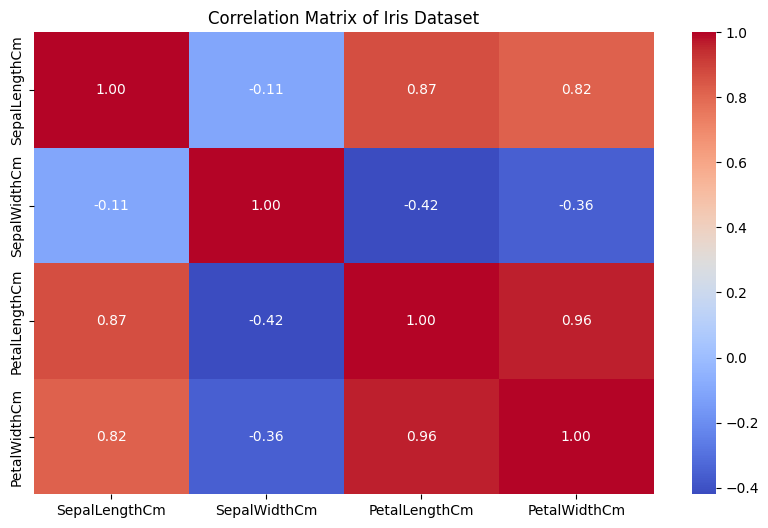

In [41]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


# Conclusions:

* The correlation matrix shows that all the features are strongly correlated with each other.
* The features 'Sepal Length', 'Sepal Width', 'Petal Length', and 'Petal Width' are highly correlated with each other.

In [42]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
# find dataset shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 150
Number of columns: 5


In [44]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [45]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# Species value counts
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [47]:
# Check unique values
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [48]:
# Checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
# Check duplicates
df.duplicated().sum()

np.int64(3)

In [50]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [51]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [52]:
df['PetalLengthCm'].value_counts()

PetalLengthCm
1.4    12
1.5    12
4.5     8
1.3     7
1.6     7
5.1     7
5.6     6
4.9     5
4.0     5
4.7     5
1.7     4
4.8     4
5.0     4
4.4     4
4.2     4
4.1     3
3.9     3
5.8     3
5.7     3
5.5     3
6.1     3
4.6     3
1.9     2
5.2     2
5.4     2
1.2     2
3.3     2
3.5     2
6.7     2
5.3     2
4.3     2
5.9     2
6.0     2
1.0     1
1.1     1
3.7     1
3.8     1
3.6     1
3.0     1
6.3     1
6.6     1
6.9     1
6.4     1
Name: count, dtype: int64

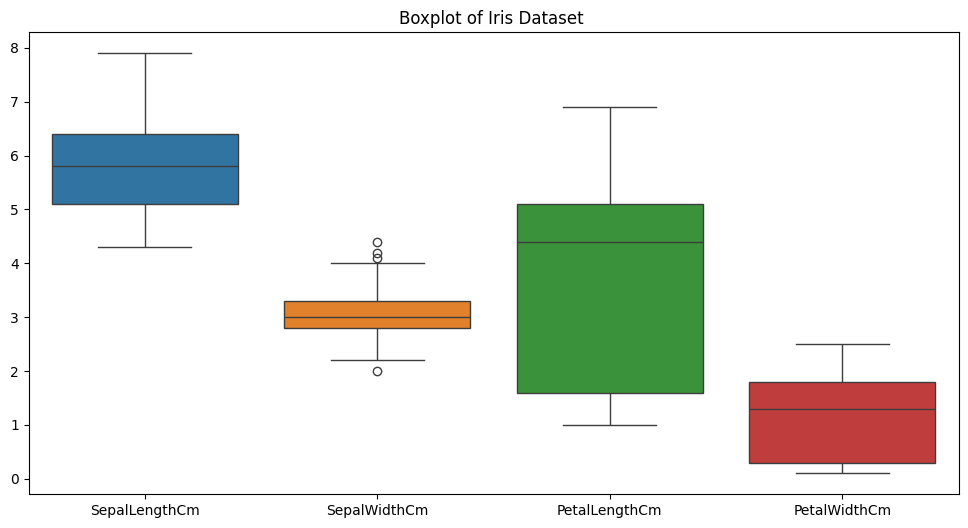

In [53]:
# Dealing with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Iris Dataset ')
plt.show()

# Conclusions:

* There are no missing values in the dataset.
* This dataset have 3 duplicate value i removed them.
* There are no Outliers in the dataset.

# Visualizing the data

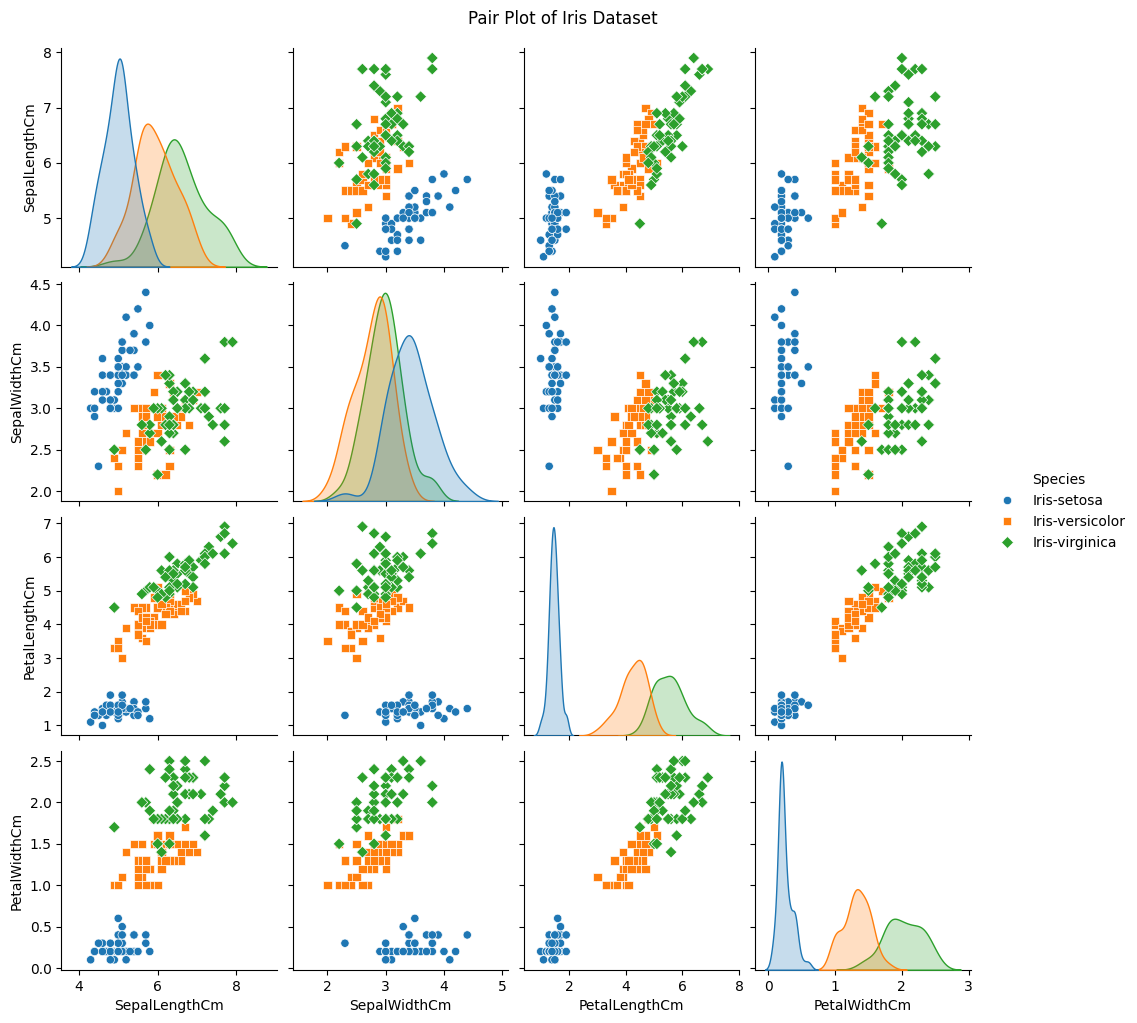

In [54]:
# Pair plot
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

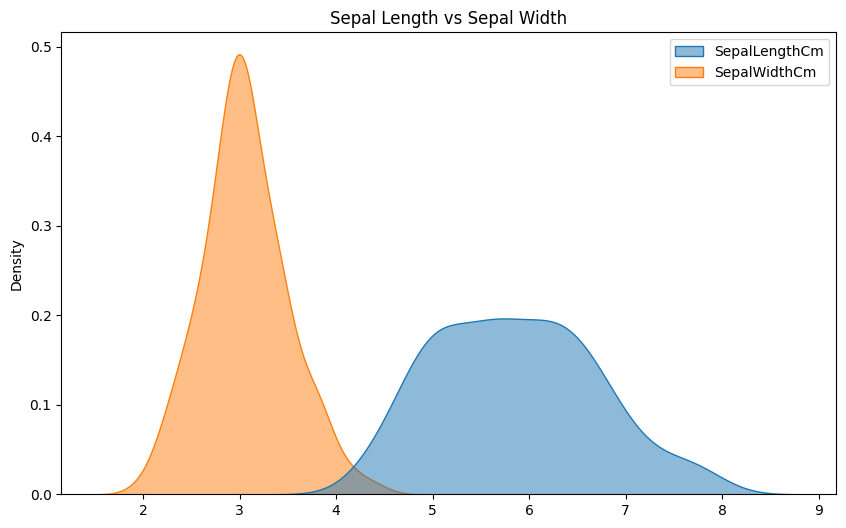

In [55]:
# Sepal Widht vs Sepal Length
plt.figure(figsize=(10, 6))
sns.kdeplot(df[['SepalLengthCm', 'SepalWidthCm']], fill=True, alpha=0.5)
plt.title('Sepal Length vs Sepal Width')
plt.show()

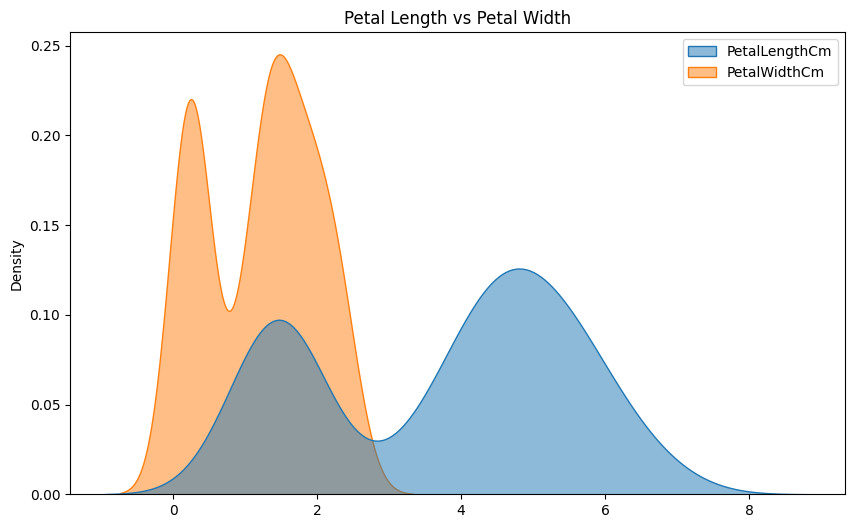

In [56]:
# Petal Widht vs Petal Length
plt.figure(figsize=(10, 6))
sns.kdeplot(df[['PetalLengthCm', 'PetalWidthCm']], fill=True, alpha=0.5)
plt.title('Petal Length vs Petal Width')
plt.show()

# Before model training we need to encode the target variable and feature scaling.

In [57]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [58]:
# train test split the data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train

array([[ 0.59486878,  0.05831127,  0.94250316,  0.76726863],
       [-1.60687754,  0.28572521, -1.38920785, -1.36694663],
       [-0.38368514, -0.62393057,  0.60127716,  1.03404553],
       [-0.8729621 ,  0.96796705, -1.33233685, -1.36694663],
       [-1.11760058,  1.195381  , -1.38920785, -1.36694663],
       [ 1.57342271, -0.16910268,  1.11311616,  0.50049172],
       [ 2.42965739,  1.65020889,  1.45434216,  1.03404553],
       [ 0.3502303 ,  0.74055311,  0.88563216,  1.43421089],
       [-0.99528134,  1.65020889, -1.10485285, -1.10016972],
       [-0.62832362,  1.87762284, -1.44607885, -1.10016972],
       [-0.62832362,  1.42279495, -1.33233685, -1.36694663],
       [ 2.18501891,  1.65020889,  1.62495516,  1.30082244],
       [ 0.47254954, -1.7610003 ,  0.31692216,  0.10032636],
       [ 1.20646499,  0.05831127,  0.71501916,  1.43421089],
       [ 0.83950727, -0.39651662,  0.43066416,  0.10032636],
       [-0.2613659 , -0.16910268,  0.20318015, -0.0330621 ],
       [ 1.08414575,  0.

# Model Training

In [63]:
# Training the model libraries
# processing
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

# import pipeline for model evaluation
from sklearn.pipeline import Pipeline



# We use function to train all models with different hyperparameters and find the best model.

In [65]:
def find_best_model():
    models = {
        'LogisticRegression': (LogisticRegression(), {}),
        'SVC': (SVC(probability=True), {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
        'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
        'RandomForest': (RandomForestClassifier(), {'n_estimators': [0,100,1000], 'max_depth': [None,5, 10]}),
        'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [100]}),
        'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [100], 'learning_rate': [0.1]}),
        'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [100], 'learning_rate': [0.1, 0.5]}),
        'NaiveBayes': (GaussianNB(), {}),
    }

    best_model = None
    best_score = 0
    best_model_name = ""
    
    for name, (model, params) in models.items():
        # Scaling where needed
        if name in ['LogisticRegression', 'SVC', 'KNN', 'NaiveBayes']:
            steps = [('scaler', MinMaxScaler()), ('clf', model)]
        else:
            steps = [('clf', model)]

        pipeline = Pipeline(steps)

        grid = GridSearchCV(pipeline, param_grid={'clf__' + k: v for k, v in params.items()}, 
                            cv=5, scoring='accuracy')
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"🔍 {name}")
        print("Best CV Accuracy:", grid.best_score_)
        print("Test Accuracy:", acc)
        print("-" * 70)

        if acc > best_score:
            best_score = acc
            best_model = grid.best_estimator_
            best_model_name = name

    print(f"\n🏆 Best Model: {best_model_name}")
    print(f"✅ Test Accuracy: {best_score:.4f}")
    return best_model

In [66]:
best_model = find_best_model()

🔍 LogisticRegression
Best CV Accuracy: 0.9141304347826088
Test Accuracy: 0.9666666666666667
----------------------------------------------------------------------
🔍 SVC
Best CV Accuracy: 0.9742753623188406
Test Accuracy: 0.9333333333333333
----------------------------------------------------------------------
🔍 DecisionTree
Best CV Accuracy: 0.9659420289855072
Test Accuracy: 0.9333333333333333
----------------------------------------------------------------------
🔍 RandomForest
Best CV Accuracy: 0.9659420289855072
Test Accuracy: 0.9333333333333333
----------------------------------------------------------------------
🔍 KNN
Best CV Accuracy: 0.9742753623188406
Test Accuracy: 0.9333333333333333
----------------------------------------------------------------------
🔍 GradientBoosting
Best CV Accuracy: 0.9572463768115942
Test Accuracy: 0.9333333333333333
----------------------------------------------------------------------
🔍 XGBoost
Best CV Accuracy: 0.9572463768115942
Test Accuracy: 0.9


✅ Model Accuracy: 0.967

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



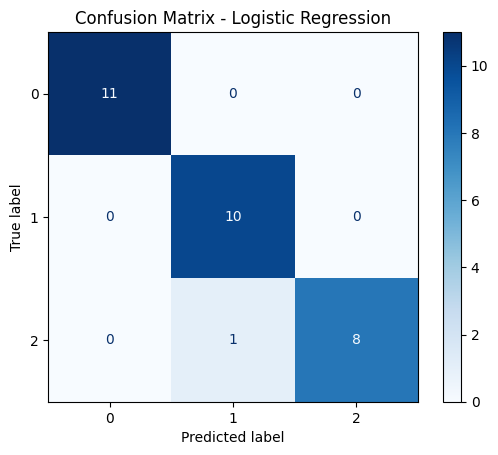

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Observation:

* The best model is Logistic Regression with a test accuracy of 0.9667.

In [70]:
# Save the model
import pickle
pickle.dump(best_model, open('iris_model.pkl', 'wb'))